## 0. Upload and extract Assesment 3 NLP.gz files


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Upload files

In [ ]:
from google.colab import files

# Upload each .gz file
uploaded = files.upload()

### Extract .tar.gz files on custom folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Assessment3')

In [ ]:
import os
import tarfile
import gzip
import ipywidgets as widgets
from IPython.display import display

# List files in /content directory
files_in_content = [f for f in os.listdir("/content/drive/MyDrive/Assessment3") if os.path.isfile(os.path.join("/content/drive/MyDrive/Assessment3", f))]

# Create dropdown for selecting files
file_dropdown = widgets.Dropdown(
    options=files_in_content,
    description='Select File:',
)

# Input box for specifying target directory name
folder_input = widgets.Text(
    value='destination_folder',
    placeholder='Type folder name',
    description='Folder Name:',
)

# Button to trigger extraction
extract_button = widgets.Button(description="Extract")

# Output widget to show extraction logs
output = widgets.Output()

# Display widgets
display(file_dropdown, folder_input, extract_button, output)

def extract_file(b):
    # Extract selected file
    uploaded_file = os.path.join("/content/drive/MyDrive/Assessment3", file_dropdown.value)
    folder_name = folder_input.value
    target_dir = os.path.join("/content/drive/MyDrive/Assessment3", folder_name)

    with output:
        if uploaded_file.endswith('.gz') and not uploaded_file.endswith('.tar.gz'):
            # Extract .gz files
            extracted_file_path = os.path.join(target_dir, os.path.splitext(file_dropdown.value)[0])
            os.makedirs(target_dir, exist_ok=True)
            with gzip.open(uploaded_file, 'rb') as f_in, open(extracted_file_path, 'wb') as f_out:
                f_out.write(f_in.read())
            print(f"Decompressed {file_dropdown.value} to {extracted_file_path}")

        elif uploaded_file.endswith('.tar.gz'):
            # Extract .tar.gz archives
            os.makedirs(target_dir, exist_ok=True)
            with tarfile.open(uploaded_file, 'r:gz') as tar:
                tar.extractall(path=target_dir)
            print(f"Extracted {file_dropdown.value} to {target_dir}")

        # List contents
        if os.path.exists(target_dir):
            if os.path.isdir(target_dir):
                print(f"Contents of folder {folder_name}:")
                for item in os.listdir(target_dir):
                    print(item)
            else:
                print(f"{folder_name} is a file.")
            print("\n")
        else:
            print(f"{folder_name} not found.\n")

extract_button.on_click(extract_file)




### UTILITY: Delete all extracted files

In [ ]:
import os
import shutil

# List of original uploaded files you want to keep
original_files = ["book.unlabeled.gz", "domain_sentiment_data.tar.gz"]

# Specify the directory where files were uploaded
directory = "/content/Assessment3"

for item in os.listdir(directory):
    item_path = os.path.join(directory, item)

    if item not in original_files:
        # If it's a directory, remove the entire directory using shutil
        if os.path.isdir(item_path):
            shutil.rmtree(item_path)
        # If it's a file, just remove it
        elif os.path.isfile(item_path):
            os.remove(item_path)
        print(f"Deleted {item}")

print("Cleanup completed.")


Deleted domain_sentiment_data.tar
Deleted book.unlabeled
Cleanup completed.


# 1. Data preparation

### Import and Install Modules

In [ ]:
import pkg_resources
import nltk
import subprocess

def is_package_installed(package_name):
    """Check if a Python package is installed."""
    try:
        pkg_resources.get_distribution(package_name)
        return True
    except pkg_resources.DistributionNotFound:
        return False

def is_nltk_corpus_downloaded(corpus):
    """Check if the specified NLTK corpus is downloaded."""
    try:
        nltk.data.find(f"corpora/{corpus}")
        return True
    except LookupError:
        return False

def install_package(package_name):
    """Install a Python package using pip."""
    subprocess.call(["pip", "install", package_name])

# Check if packages are installed
packages = ['tensorflow', 'unidecode', 'textblob', 'matplotlib', 'wordcloud', 'transformers', 'keras-tuner', 'ipywidgets']
installed_packages = [pkg for pkg in packages if is_package_installed(pkg)]
missing_packages = [pkg for pkg in packages if pkg not in installed_packages]

# Install missing packages
for pkg in missing_packages:
    print(f"Installing {pkg}...")
    install_package(pkg)
    print(f"Installed {pkg}!")

# Check if NLTK corpora are downloaded
corpora = ['stopwords', 'punkt', 'wordnet', 'averaged_perceptron_tagger']
missing_corpora = [corpus for corpus in corpora if not is_nltk_corpus_downloaded(corpus)]

# Download missing NLTK corpora
for corpus in missing_corpora:
    print(f"Downloading {corpus} corpus...")
    nltk.download(corpus)
    print(f"Downloaded {corpus} corpus!")

print("Installed Packages:", installed_packages + missing_packages)
print("All NLTK Corpora are downloaded!")



Installing unidecode...
Installed unidecode!
Installing transformers...
Installed transformers!
Installing keras-tuner...
Installed keras-tuner!
Downloaded stopwords corpus!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Downloaded punkt corpus!


[nltk_data] Downloading package wordnet to /root/nltk_data...


Downloaded wordnet corpus!
Downloaded averaged_perceptron_tagger corpus!
Installed Packages: ['tensorflow', 'textblob', 'matplotlib', 'wordcloud', 'ipywidgets', 'unidecode', 'transformers', 'keras-tuner']
All NLTK Corpora are downloaded!


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### UTILITY: Create Databases Files (if they have not been created yet)

In [ ]:
import os

def create_empty_database(database_name):
    base_path = "/content/drive/MyDrive/Assessment3"
    file_path = os.path.join(base_path, database_name + ".txt")

    # Check if the file already exists
    if os.path.exists(file_path):
        # Warn the user that the database exists and get confirmation to clear it
        response = input(f"The database '{database_name}.txt' already exists. Do you want to clear it? (y/n): ").strip().lower()
        if response == 'y':
            with open(file_path, 'w') as file:  # This will make the file empty
                pass
            print(f"Database '{database_name}.txt' cleared successfully.")
        else:
            print(f"Database '{database_name}.txt' not modified.")
    else:
        # If the file doesn't exist, create an empty file (i.e., database)
        with open(file_path, 'w') as file:
            pass
        print(f"Database '{database_name}.txt' created successfully.")

if __name__ == "__main__":
    db_name = input("Enter the name of the database (without extension): ").strip()
    if not db_name:
        print("Please enter a valid database name.")
    else:
        create_empty_database(db_name)


### UTILITY: Display XML content

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from bs4 import BeautifulSoup

REVIEWS_PER_PAGE = 10  # Adjust this based on your requirement

def process_xml(xml_content, page_number=1):
    try:
        soup = BeautifulSoup(xml_content, 'lxml')
        reviews = soup.find_all('review')

        start_index = (page_number - 1) * REVIEWS_PER_PAGE
        end_index = start_index + REVIEWS_PER_PAGE

        for i, review_elem in enumerate(reviews[start_index:end_index], start=start_index + 1):
            print(f"\nReview {i}:")
            if i == start_index + 1:
                element_names = [element.name for element in review_elem.find_all()]

            for element_name in element_names:
                element = review_elem.find(element_name)
                if element:
                    element_text = ' '.join(element.stripped_strings)
                    print(f"{element_name.capitalize()}: {element_text}")
            print("-" * 50)

        return len(reviews)

    except Exception as e:
        print("Error processing XML:", e)
        return 0

def display_content_with_pagination(xml_content):
    total_reviews = process_xml(xml_content)
    total_pages = (total_reviews + REVIEWS_PER_PAGE - 1) // REVIEWS_PER_PAGE
    current_page = 1

    # Display summary
    print(f"Total reviews: {total_reviews}")
    print(f"Total pages: {total_pages}")

    # Define the function to update the display on button click or dropdown change
    def update_display(page_number):
        clear_output(wait=True)
        process_xml(xml_content, page_number)
        display_controls(page_number)
        print(f"Total reviews: {total_reviews}")
        print(f"Total pages: {total_pages}")

    # Define the controls (buttons and dropdown)
    def display_controls(page_number):
        btn_prev = widgets.Button(description="Previous")
        btn_next = widgets.Button(description="Next")
        page_selector = widgets.Dropdown(
            options=[i for i in range(1, total_pages + 1)],
            value=page_number,
            description='Page:'
        )

        if page_number <= 1:
            btn_prev.disabled = True
        if page_number >= total_pages:
            btn_next.disabled = True

        # Button click events
        def go_prev(b):
            nonlocal current_page
            current_page -= 1
            update_display(current_page)

        def go_next(b):
            nonlocal current_page
            current_page += 1
            update_display(current_page)

        # Dropdown event
        def on_page_change(change):
            if change['type'] == 'change' and change['name'] == 'value':
                update_display(change['new'])

        page_selector.observe(on_page_change)

        btn_prev.on_click(go_prev)
        btn_next.on_click(go_next)

        display(widgets.HBox([btn_prev, page_selector, btn_next]))

    display_controls(current_page)

button_DisplayContent = widgets.Button(description="Display File Data")

def on_button_click_DisplayContent(b):
    global shared_selected_file
    if shared_selected_file:
        print(f"Selected file: {shared_selected_file}")
        try:
            with open(shared_selected_file, "r") as file:
                xml_content = file.read()
                display_content_with_pagination(xml_content)
        except IOError as e:
            print("Error reading file:", e)
    else:
        print("Please select a file before executing.")

button_DisplayContent.on_click(on_button_click_DisplayContent)
display(button_DisplayContent)





Review 31:
Unique_id: B000ER23M2:an_unexpected_surprise:c._s.
Asin: B000ER23M2
Product_name: Logitech NuLOOQ Navigator (965162-0403): Electronics
Product_type: electronics
Helpful: 5 of 7
Rating: 5.0
Title: An unexpected surprise
Date: July 23, 2006
Reviewer: C. S.
Reviewer_location: Albany, NY
Review_text: I bought the NuLOOQ product a few weeks ago with little expectation and actually with some doubts it'd do anything for me, as I'm a keyboard junkie.  The product description was a bit confusing as it seems like ti does a lot.  But what a surprise.   Just adjusting the brush size using the ipod like scroll disc on the device is worth the price.  The pop-up menu thing is cool.  I don't use it as much for putting tools, but putting my files and folders into that menu keeps things in one place.   I guess the product also lets you pan and zoom around, but I don't seem to use that as much.  I still like using my mouse to pan and zoom around.

Hey, I was skeptical about the product like a

Total reviews: 1000
Total pages: 100


### UTILITY: Sumarize Tokens from processed file

In [ ]:
import collections
import ipywidgets as widgets
from IPython.display import display, clear_output

def summarize_tokens():
    # Flatten the list of processed reviews into a list of tokens
    all_tokens = [token for review in processed_reviews for token in review]

    # Total number of tokens
    total_tokens = len(all_tokens)

    # Total number of unique tokens
    unique_tokens = len(set(all_tokens))

    # Top 10 most common tokens
    token_counts = collections.Counter(all_tokens)
    most_common_tokens = token_counts.most_common(50)

    # Average token length
    avg_token_length = sum(len(token) for token in all_tokens) / total_tokens

    # Display the summary
    print(f"Total tokens: {total_tokens}")
    print(f"Total unique tokens: {unique_tokens}")
    print("\nTop 50 most common tokens:")
    for token, count in most_common_tokens:
        print(f"{token}: {count}")
    print(f"\nAverage token length: {avg_token_length:.2f} characters")

# Button to summarize tokens
button = widgets.Button(description="Summarize Tokens")
output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output(wait=True)
        summarize_tokens()

button.on_click(on_button_click)
display(button, output)


Button(description='Summarize Tokens', style=ButtonStyle())

Output()

### UTILITY: Sumarize Tokens Extracted (single Database)


Available databases:
1. TOKENS_Positive.txt
2. TOKENS_Negative.txt
3. BERT_Negative.txt
4. BERT_Positive.txt

Enter the number of the database you want to visualize: 4


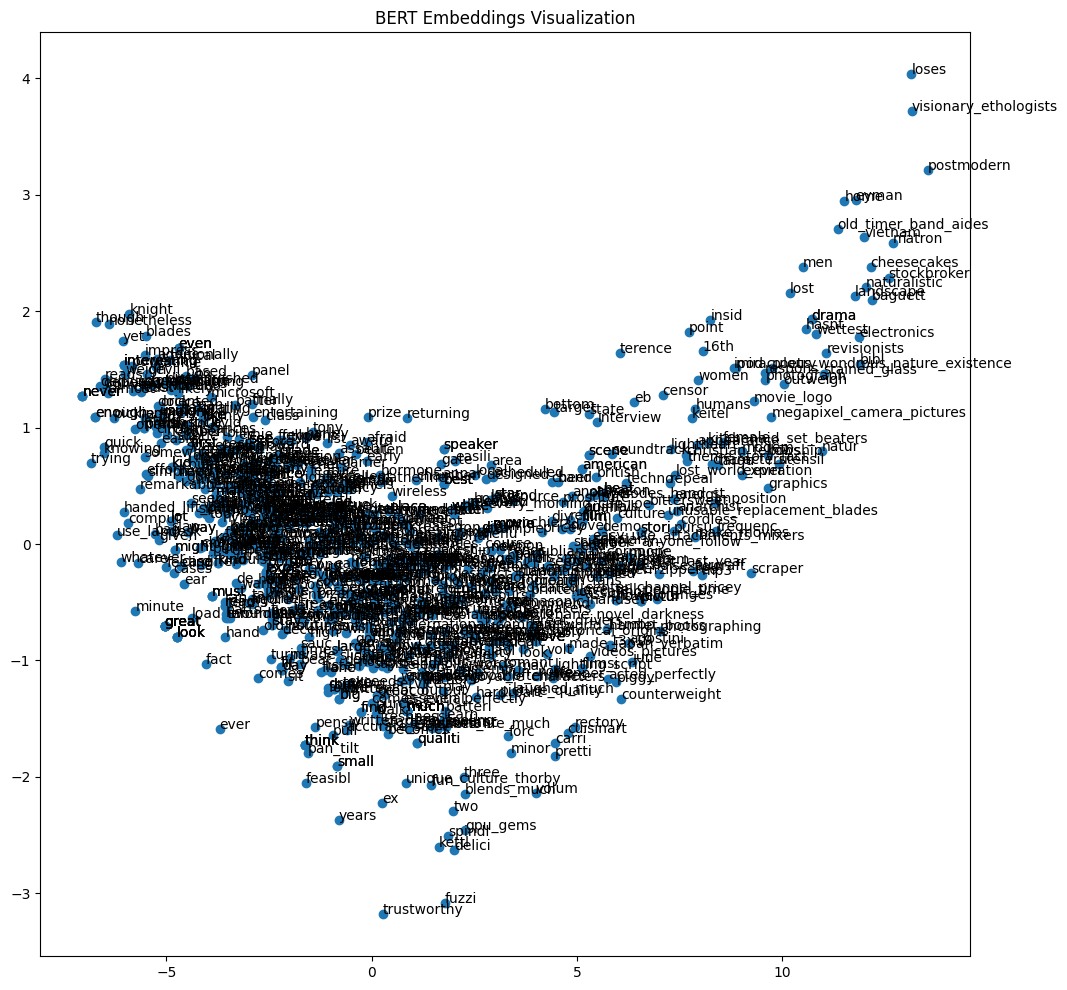

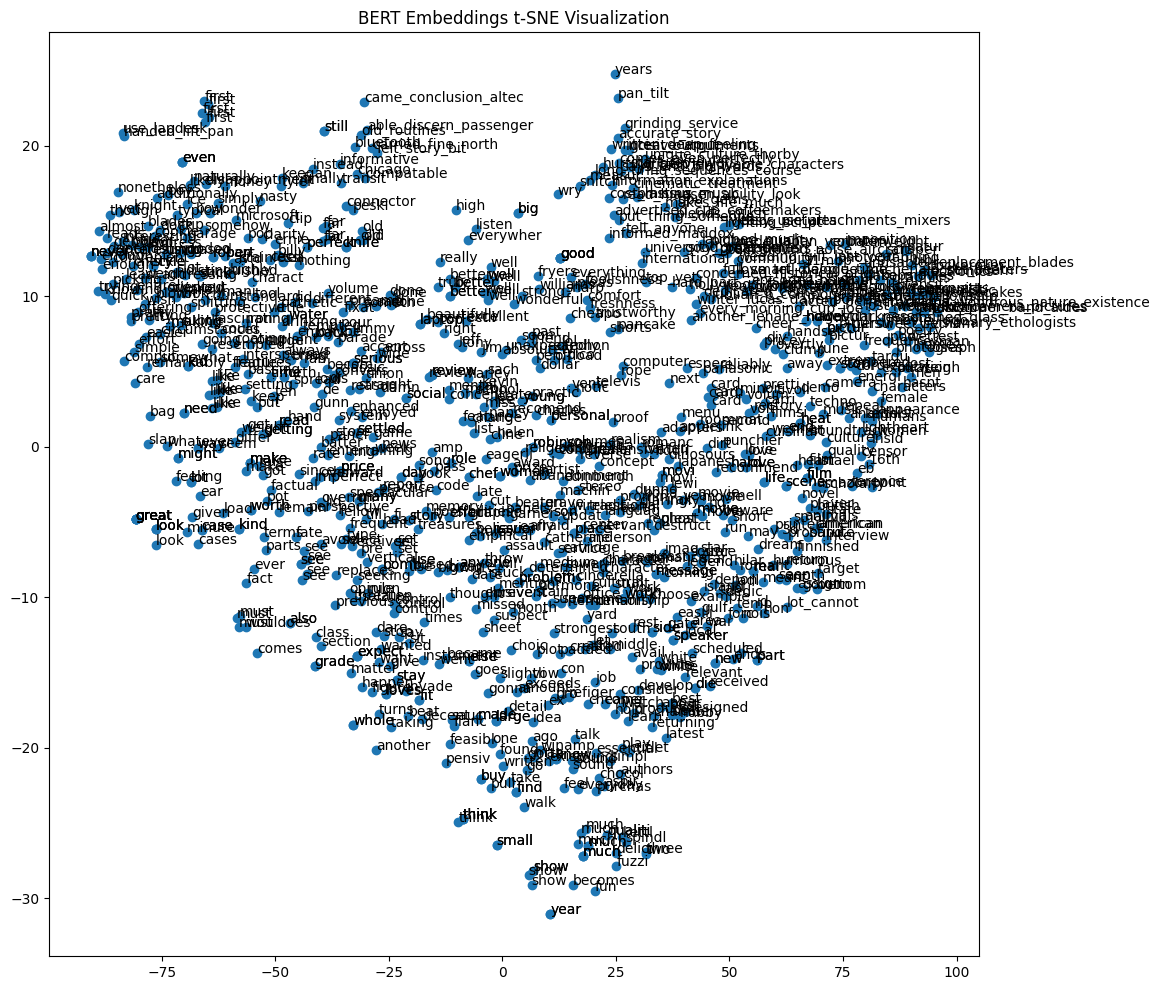

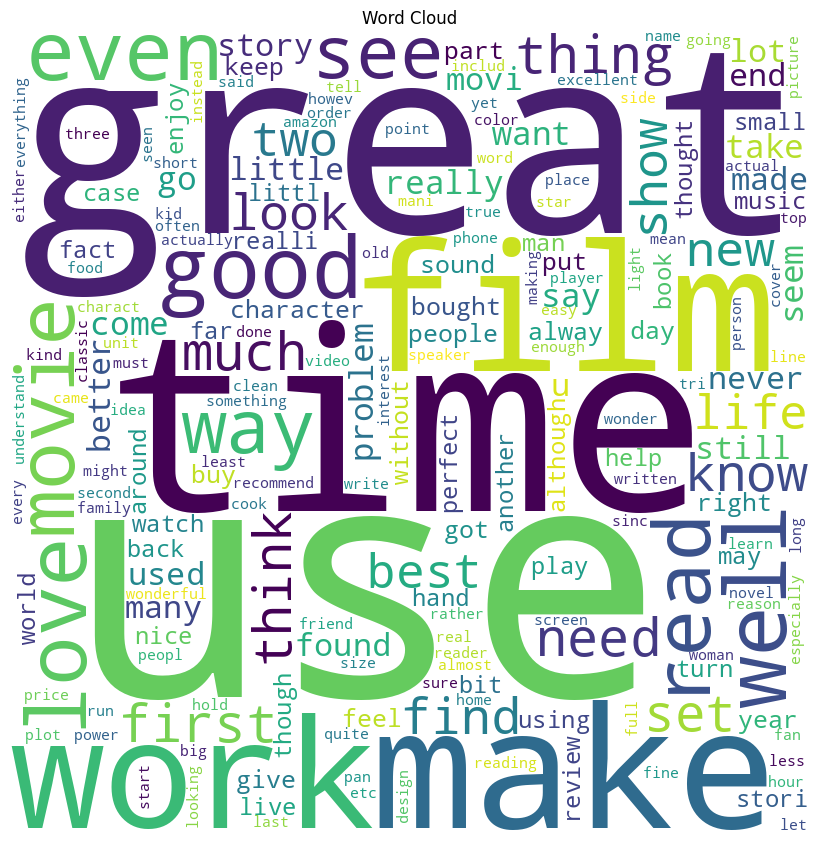

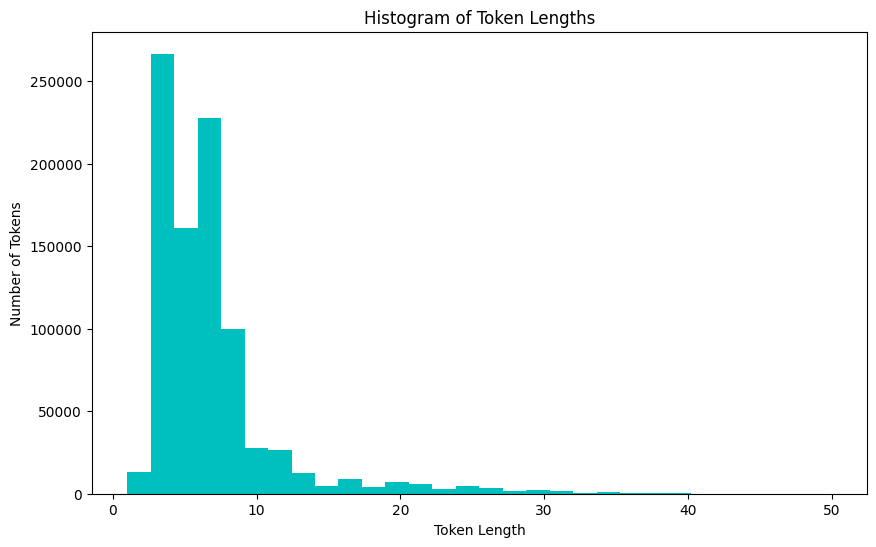

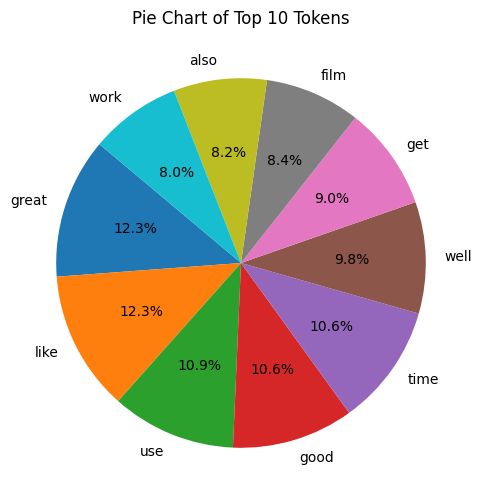

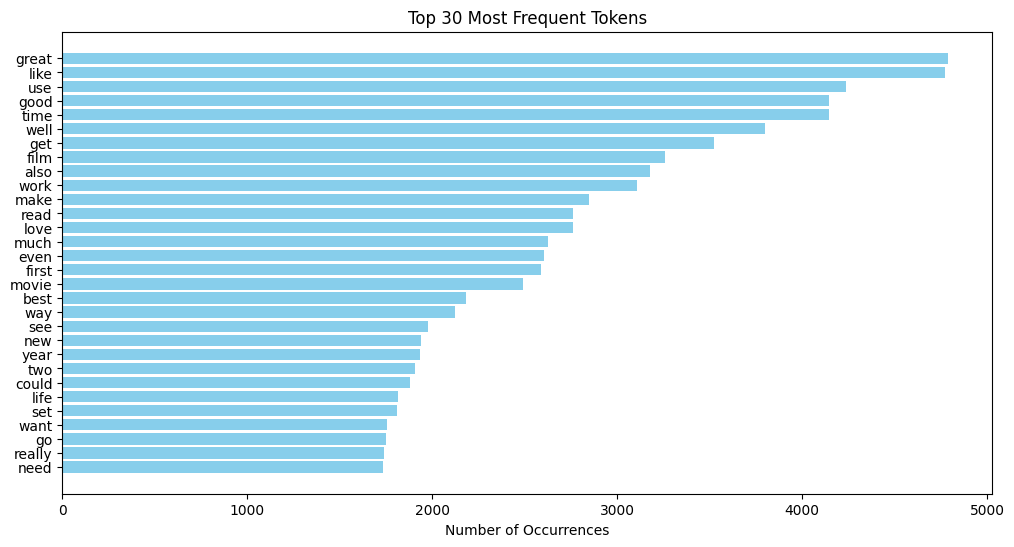

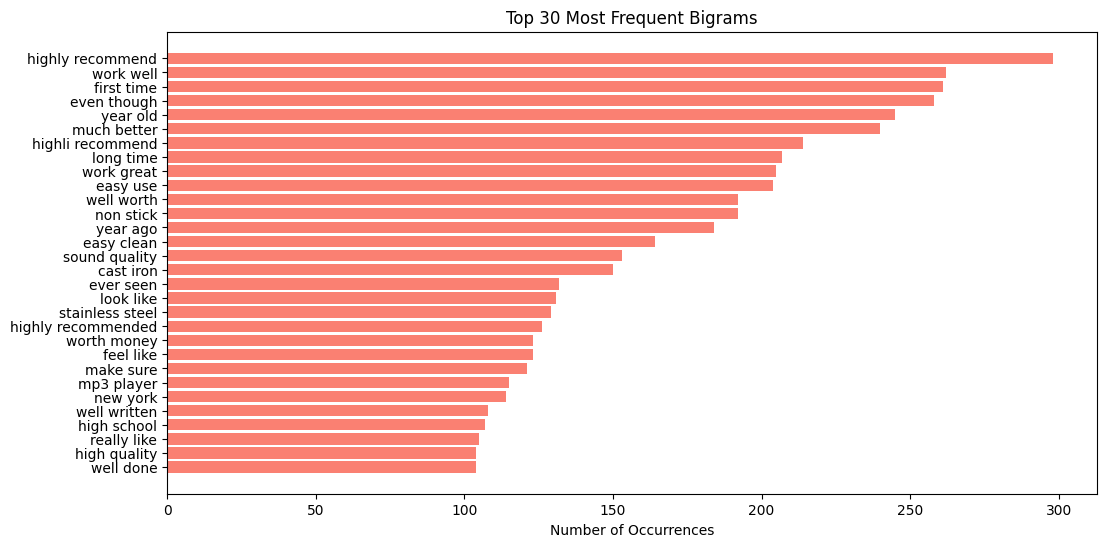

In [ ]:
import os
import numpy as np
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS
import nltk

def visualize_most_frequent(tokens, N=30):
    freq_dist = nltk.FreqDist(tokens)
    most_common_tokens = freq_dist.most_common(N)
    labels, values = zip(*most_common_tokens)
    plt.figure(figsize=(12, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Number of Occurrences')
    plt.title(f'Top {N} Most Frequent Tokens')
    plt.gca().invert_yaxis()  # To display the most frequent at the top
    plt.show()

def visualize_bigram_frequency(tokens, N=30):
    bigrams = list(nltk.bigrams(tokens))
    bigram_freq = nltk.FreqDist(bigrams)
    most_common_bigrams = bigram_freq.most_common(N)
    labels, values = zip(*most_common_bigrams)
    labels = [' '.join(tup) for tup in labels]
    plt.figure(figsize=(12, 6))
    plt.barh(labels, values, color='salmon')
    plt.xlabel('Number of Occurrences')
    plt.title(f'Top {N} Most Frequent Bigrams')
    plt.gca().invert_yaxis()
    plt.show()

def visualize_histogram(tokens):
    token_lengths = [len(token) for token in tokens]
    plt.figure(figsize=(10, 6))
    plt.hist(token_lengths, bins=30, color='c')
    plt.title('Histogram of Token Lengths')
    plt.xlabel('Token Length')
    plt.ylabel('Number of Tokens')


# Function to visualize using t-SNE
def visualize_tsne(embeddings, tokens):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(12, 12))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
    for i, token in enumerate(tokens):
        plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)  # Adjust fontsize here
    plt.title("BERT Embeddings t-SNE Visualization")
    plt.show()

def visualize_pie_chart(tokens, N=10):
    freq_dist = nltk.FreqDist(tokens)
    most_common_tokens = freq_dist.most_common(N)
    labels, values = zip(*most_common_tokens)
    plt.figure(figsize=(10, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Pie Chart of Top {} Tokens'.format(N))

# Function to display a word cloud
def display_word_cloud(tokens):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,  # Using the STOPWORDS set provided by the WordCloud library
                min_font_size = 10).generate(' '.join(tokens))

    # Plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title("Word Cloud")


# Folder path
base_path = "/content/drive/MyDrive/Assessment3"

# Function to list all .txt databases in the folder
def list_databases(directory):
    return [file for file in os.listdir(directory) if file.endswith(".txt")]

# Function to visualize using t-SNE
def visualize_tsne(embeddings, tokens):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(12, 12))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
    for i, token in enumerate(tokens):
        plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.title("BERT Embeddings t-SNE Visualization")

# Function to process and visualize a selected database
def process_and_visualize_database(db_name, sample_size=1000):
    with open(os.path.join(base_path, db_name), 'r') as f:
        tokens = f.read().split()

    # If the dataset is large, randomly sample a subset for visualization using BERT embeddings
    sampled_tokens = random.sample(tokens, min(sample_size, len(tokens)))

    inputs = bert_tokenizer(sampled_tokens, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs['pooler_output'].numpy()

    # Visualizations
    visualize_embeddings(embeddings, sampled_tokens)
    visualize_tsne(embeddings, sampled_tokens)
    display_word_cloud(tokens)
    visualize_histogram(tokens)
    visualize_pie_chart(tokens)
    visualize_most_frequent(tokens)
    visualize_bigram_frequency(tokens)
    plt.show()  # Show all the visualizations at once

# User interaction for database selection
print("\nAvailable databases:")
databases = list_databases(base_path)
for idx, db in enumerate(databases, 1):
    print(f"{idx}. {db}")

choice = int(input("\nEnter the number of the database you want to visualize: "))
selected_db = databases[choice-1]

# Process and visualize
process_and_visualize_database(selected_db)


### 1. Select File to extract Tokens

In [ ]:
import os
import ipywidgets as widgets
from IPython.display import display
import xml.etree.ElementTree as ET

# Helper function to list all files recursively in a directory
def list_all_files(directory):
    all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(directory) for f in filenames]
    # Filter to only include files that end with .review
    return [f for f in all_files if f.endswith('.review')]

# Custom folder path defined within the script
custom_folder_path = "/content/drive/MyDrive/Assessment3"

# Global variable to store the selected file
shared_selected_file = None

# Callbacks for widget interactions
def on_folder_changed(change):
    files = list_all_files(folder_selector.value)
    file_selector.options = files
    if files:
        file_selector.value = files[0]
    else:
        file_selector.value = None

def on_file_select(change):
    global shared_selected_file
    shared_selected_file = change['new']

# Create widgets
folder_selector = widgets.Dropdown(
    options=[custom_folder_path],  # Set the custom folder as the only option
    description='Folder:'
)

file_selector = widgets.Dropdown(
    options=[],
    description='File:'
)

folder_selector.observe(on_folder_changed, names='value')
file_selector.observe(on_file_select, names='value')

execute_button = widgets.Button(description="Execute")

def on_button_click(button):
    if shared_selected_file:
        print(f"Selected file: {shared_selected_file}")
    else:
        print("Please select a file before executing.")

execute_button.on_click(on_button_click)

# Initialize
on_folder_changed(None)

# Display widgets
display(file_selector, execute_button)




Sumarise Positive and Negarive (tabular comparative format)

In [ ]:
import os
import numpy as np
import pandas as pd
import nltk

base_path = "/content/drive/MyDrive/Assessment3"

# Function to list all .txt databases in the folder
def list_databases(directory):
    return [file for file in os.listdir(directory) if file.endswith(".txt")]

# Function to get statistics for tokens
def get_statistics(tokens, N=5):
    freq_dist = nltk.FreqDist(tokens)
    bigrams = list(nltk.bigrams(tokens))
    bigram_freq = nltk.FreqDist(bigrams)
    token_lengths = [len(token) for token in tokens]
    token_length_dist = nltk.FreqDist(token_lengths)

    data = {
        "Total Tokens": len(tokens),
        "Unique Tokens": len(set(tokens)),
        "Average Token Length": np.mean(token_lengths)
    }

    for i in range(N):
        data[f"Top Token {i+1} (word)"] = freq_dist.most_common(N)[i][0]
        data[f"Top Token {i+1} (count)"] = freq_dist.most_common(N)[i][1]
        data[f"Top Bigram {i+1} (bigram)"] = ' '.join(bigram_freq.most_common(N)[i][0])
        data[f"Top Bigram {i+1} (count)"] = bigram_freq.most_common(N)[i][1]
        data[f"Top Token Length {i+1} (length)"] = token_length_dist.most_common(N)[i][0]
        data[f"Top Token Length {i+1} (count)"] = token_length_dist.most_common(N)[i][1]

    return data

# Function to process databases and provide statistics
def process_and_compare_databases(pos_db_name, neg_db_name):
    # Load tokens from positive database
    with open(os.path.join(base_path, pos_db_name), 'r') as f:
        pos_tokens = f.read().split()

    # Load tokens from negative database
    with open(os.path.join(base_path, neg_db_name), 'r') as f:
        neg_tokens = f.read().split()

    combined_tokens = pos_tokens + neg_tokens

    # Get statistics
    pos_stats = get_statistics(pos_tokens)
    neg_stats = get_statistics(neg_tokens)
    combined_stats = get_statistics(combined_tokens)

    return pd.DataFrame({"Positive": pos_stats, "Negative": neg_stats, "Combined": combined_stats})

# User interaction for database selection
print("\nAvailable databases:")
databases = list_databases(base_path)
for idx, db in enumerate(databases, 1):
    print(f"{idx}. {db}")

pos_choice = int(input("\nEnter the number of the POSITIVE database you want to analyze: "))
neg_choice = int(input("Enter the number of the NEGATIVE database you want to analyze: "))
pos_db = databases[pos_choice-1]
neg_db = databases[neg_choice-1]

# Process and display statistics
stats_df = process_and_compare_databases(pos_db, neg_db)
display(stats_df)




Available databases:
1. TOKENS_Positive.txt
2. TOKENS_Negative.txt
3. BERT_Negative.txt
4. BERT_Positive.txt

Enter the number of the POSITIVE database you want to analyze: 4
Enter the number of the NEGATIVE database you want to analyze: 3


,Positive,Negative,Combined
Total Tokens,884280,852694,1736974
Unique Tokens,106836,102015,185985
Average Token Length,6.716548,6.704112,6.710443
Top Token 1 (word),great,like,like
Top Token 1 (count),4788,5134,9906
Top Bigram 1 (bigram),highly recommend,much better,much better
Top Bigram 1 (count),298,385,625
Top Token Length 1 (length),4,4,4
Top Token Length 1 (count),193258,188129,381387
Top Token 2 (word),like,get,time


### 1.1 Process Tokens and add to Database

In [ ]:
import os
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
import torch
import random
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')



freq_dist = FreqDist()
chunked_freq_dist = FreqDist()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Additional stopwords
category_specific_stopwords = [
    "book", "author", "page", "chapter", "publisher", "edition", "dvd",
    "episode", "season", "series", "disc", "scene", "device",
    "model", "feature", "product",
    "kitchen", "item", "one" , "would"
]
stop_words.update(category_specific_stopwords)

# Initialize tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Initialize stemmer
stemmer = PorterStemmer()

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the pooled output as the representation for the entire sentence
    return outputs['pooler_output'].numpy()

def train_word2vec(processed_reviews):
    # Train a Word2Vec model
    model = Word2Vec(sentences=processed_reviews, vector_size=100, window=5, workers=4, min_count=1)
    # Save the model for later use
    model.save("word2vec.model")
    print("Word2Vec Model Saved!")

def extract_review_texts_from_file(file_name):
    """Extract only the review texts from the XML."""
    with open(file_name, 'r') as file:
        content = file.read()
    soup = BeautifulSoup(content, 'lxml')
    reviews = [tag.get_text() for tag in soup.find_all('review_text')]
    return reviews

def handle_contractions(text):
    """Handle common contractions in the text."""
    contractions_map = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'d": " would",
        "'ll": " will",
        "'m": " am",
        "'re": " are",
        "'s": " is",
        "'ve": " have",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "I would",
        "i'll": "I will",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "might've": "might have",
        "mightn't": "might not",
        "must've": "must have",
        "mustn't": "must not",
        "needn't": "need not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "that'd": "that would",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have",
    }

    for contraction, expansion in contractions_map.items():
        text = text.replace(contraction, expansion)
    return text


def preprocess_reviews(file_name):
    global freq_dist, chunked_freq_dist

    # Define chunk grammar rules
    chunk_grammar = r"""
        NP: {<DT|JJ>*<NN.*>+}       # Noun Phrase with nouns and optional determiners/adjectives
        VP: {<VB.*><NP|PP|RB>*}     # Verb Phrase with a verb followed by noun phrase, prepositional phrase or adverb
        NegAdj: {<RB><JJ>}          # Negative adverb followed by an adjective
    """
    def filter_chunks_by_length(chunked_phrases, min_len=2, max_len=4):
            """Filters chunks based on their length."""
            return [phrase for phrase in chunked_phrases if min_len <= len(phrase.split('_')) <= max_len]


    chunk_parser = nltk.RegexpParser(chunk_grammar)

    reviews = extract_review_texts_from_file(file_name)
    print(f"\nProcessing reviews from file: {file_name}\n")
    processed_reviews = []
    all_chunked_phrases = []

    for review in reviews:

        # Remove hyperlinks
        review = re.sub(r'http\S+', '', review)

        # Handle contractions
        review = handle_contractions(review)

        # Remove hyperlinks
        review = re.sub('http.*','', review)

        # Remove mentions and hashtags
        review = re.sub(r'@\w*','', review)
        review = re.sub(r'#','', review)

        # Convert to lowercase
        review = review.lower()

        # Remove HTML tags
        review = re.sub(r'<.*?>', '', review)

        # Tokenization using RegexpTokenizer
        tokens = tokenizer.tokenize(review)

        # Convert to lowercase
        tokens = [word.lower() for word in tokens]

        # Remove punctuation and unwanted characters/sequences
        unwanted_chars = set(string.punctuation).union({"...", "--", "``", "''"})
        tokens = [word for word in tokens if word not in unwanted_chars]
        tokens = [word for word in tokens if word not in stop_words]

        # Remove numbers
        tokens = [word for word in tokens if not word.isdigit()]

        # Remove stopwords
        tokens_without_stopwords = [word for word in tokens if word not in stop_words]

        # POS Tagging
        pos_tags = nltk.pos_tag(tokens_without_stopwords)

        # Chunking
        chunks = chunk_parser.parse(pos_tags)
        chunked_phrases = ['_'.join([word for word, pos in subtree.leaves()]) for subtree in chunks.subtrees() if subtree.label() in ["NP", "VP", "NegAdj"]]
        chunked_phrases = filter_chunks_by_length(chunked_phrases)  # Filter by length

        all_chunked_phrases.extend(chunked_phrases)  # Step 2: Add the chunked phrases of the current review


        # Stemming
        stemmed_tokens = [stemmer.stem(word) for word in tokens_without_stopwords]

        # Lemmatization
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_without_stopwords]

        # Combine the tokens, chunked phrases, stemmed tokens, and lemmatized tokens for the current review
        combined_tokens = tokens + chunked_phrases + stemmed_tokens + lemmatized_tokens
        processed_reviews.append(combined_tokens)

    # Step 3: Compute the frequency distribution using all_chunked_phrases
    chunked_freq_dist = FreqDist(all_chunked_phrases)

    top_chunked_phrases = [phrase for phrase, count in chunked_freq_dist.most_common(100)]  # Top 100 chunked phrases, adjust as needed

    # Calculate the frequency distribution of tokens
    all_tokens = [token for review_tokens in processed_reviews for token in review_tokens]
    freq_dist = FreqDist(all_tokens)
    # Update the frequency distribution of tokens
    for review_tokens in processed_reviews:
        for token in review_tokens:
            freq_dist[token] += 1

    labels = [random.choice([0, 1]) for _ in range(len(reviews))]
    return processed_reviews, labels

# Tokenize the data using BERT's tokenizer
def bert_tokenize(data, labels):
    input_ids = []
    attention_masks = []
    token_type_ids = []

    for item in data:
        encoded = bert_tokenizer.encode_plus(
            item,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=True,
            truncation=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        token_type_ids.append(encoded['token_type_ids'])

    return torch.tensor(input_ids), torch.tensor(attention_masks), torch.tensor(token_type_ids), torch.tensor(labels)

# Use the modified preprocess_reviews function
processed_reviews, labels = preprocess_reviews(shared_selected_file)

# Tokenize the data
input_ids, attention_masks, token_type_ids, labels = bert_tokenize(processed_reviews, labels)

# Split the data into training, validation, and test sets
train_inputs, temp_inputs, train_labels, temp_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.3)
val_inputs, test_inputs, val_labels, test_labels = train_test_split(temp_inputs, temp_labels, random_state=42, test_size=0.5)

# Similarly, split the attention masks and token type ids
train_masks, temp_masks, _, _ = train_test_split(attention_masks, input_ids, random_state=42, test_size=0.3)
val_masks, test_masks, _, _ = train_test_split(temp_masks, temp_inputs, random_state=42, test_size=0.5)

def select_database_for_tokens():
    """Present available databases to the user to choose."""
    base_path = "/content/drive/MyDrive/Assessment3"

    # Error handling for accessing the directory
    try:
        # List all available databases in the folder
        available_databases = [file for file in os.listdir(base_path) if file.endswith(".txt")]

        # Check if there are any .txt files
        if not available_databases:
            print("No .txt files found in the directory!")
            db_name = input("Enter the name of the new database: ")
            return db_name

        print("\nAvailable databases:")
        for idx, db in enumerate(available_databases, 1):
            print(f"{idx}. {db}")

        choice = int(input("\nEnter the number of the database you want to add tokens to (or enter 0 to create a new database): "))

        if choice == 0:
            db_name = input("Enter the name of the new database: ")
        else:
            db_name = available_databases[choice-1].replace('.txt', '')

        return db_name

    except Exception as e:
        print(f"Error accessing directory: {e}")
        return None  # Return None or handle the error as per your requirement



def view_tokens_report(db_name, N=20):
    """View a report on the tokens stored in the given database."""
    base_path = "/content/drive/MyDrive/Assessment3"
    file_name = os.path.join(base_path, db_name + ".txt")

    try:
        # Open the database file and read the tokens
        with open(file_name, 'r') as file:
            tokens = file.readlines()

        # Calculate token statistics
        total_reviews = len(tokens)
        token_counts = [len(token_line.split()) for token_line in tokens]
        avg_tokens_per_review = sum(token_counts) / total_reviews if total_reviews else 0
        max_tokens = max(token_counts) if token_counts else 0
        min_tokens = min(token_counts) if token_counts else 0

        # Number of unique tokens
        all_tokens = ' '.join(tokens).split()
        unique_tokens_count = len(set(all_tokens))

        # Display the report
        print("\n--- Token Report ---")
        print(f"Total number of reviews (token lines) stored: {total_reviews}")
        print(f"Average number of tokens per review: {avg_tokens_per_review:.2f}")
        print(f"Longest review (in terms of tokens): {max_tokens}")
        print(f"Shortest review (in terms of tokens): {min_tokens}")
        print(f"Number of unique tokens: {unique_tokens_count}")

        N = int(N)  # Ensure N is an integer

        print("\nTop {} tokens by frequency:".format(N))
        token_freq = nltk.FreqDist(all_tokens)
        most_common_tokens = token_freq.most_common(N)
        for token, frequency in most_common_tokens:
            print(f"{token}: {frequency}")

    except FileNotFoundError:
        print(f"Error: The database named {db_name} does not exist.")


# Define display_top_tokens here
def display_top_tokens(N=20):
    """
    Display the top N tokens by frequency.
    """
    print("\nTop {} tokens by frequency:".format(N))
    for token, frequency in freq_dist.most_common(N):
        print(f"{token}: {frequency}")

def view_tokens(processed_reviews):
    for i, review in enumerate(processed_reviews[:50]):
        print(f"Processed Review {i + 1}: {review}")

def add_tokens_to_database(db_name, processed_reviews):
    full_path = os.path.join("/content/drive/MyDrive/Assessment3", db_name + ".txt")
    with open(full_path, "a") as f:
        for review in processed_reviews:
            f.write(' '.join(review) + '\n')
    print(f"Tokens added to the database at {full_path} successfully!")

def display_top_chunked_phrases(N=20):
    """
    Display the top N chunked phrases by frequency.
    """
    print("\nTop {} chunked phrases by frequency:".format(N))
    for phrase, frequency in chunked_freq_dist.most_common(N):
        print(f"{phrase}: {frequency}")

def main(processed_reviews):
    while True:
        print("\nOptions:")
        print("1. View Tokens")
        print("2. View Top Chunked Phrases")
        print("3. Add Tokens into Database")
        print("4. Exit")

        choice = input("Enter your choice (1/2/3/4): ")

        if choice == "1":
            view_tokens(processed_reviews)
        elif choice == "2":
            display_top_chunked_phrases()  # Call the function to display chunked phrases
        elif choice == "3":
            db_name = select_database_for_tokens()
            add_tokens_to_database(db_name, processed_reviews)  # Pass both db_name and processed_reviews
            view_tokens_report(db_name, 30)  # Pass freq_dist as well
            print("Exiting after successful token addition...")
            break  # Exit the loop after generating the token report
        elif choice == "4":
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please enter again.")

# This will use the selected file from the widget
train_word2vec(processed_reviews)
main(processed_reviews)


# 2. Build the ANN Architecture

##2.1. Data loading and preprocessing. (KERAZ)

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Set version and seeds for reproducibility
print(tf.__version__)
np.random.seed(42)
tf.random.set_seed(42)

# Select a database
def select_database(base_path, prompt_message):
    available_databases = [file for file in os.listdir(base_path) if file.endswith(".txt")]
    print("\nAvailable databases:")
    for idx, db in enumerate(available_databases, 1):
        print(f"{idx}. {db}")

    while True:
        try:
            choice = int(input(prompt_message))
            if 1 <= choice <= len(available_databases):
                return os.path.join(base_path, available_databases[choice-1])
            else:
                print("Invalid choice. Please select a number from the list.")
        except ValueError:
            print("Please enter a valid number.")

# Function to load reviews from a database
def load_database(file_path):
    """Load the database from a specified path."""
    with open(file_path, 'r') as file:
        reviews = file.readlines()
    return reviews

# Specify the base path and list all files
base_path = "/content/drive/MyDrive/Assessment3"
print("All files in the directory:", os.listdir(base_path))

# Load negative and positive reviews
negative_db_path = select_database(base_path, "\nSelect the number of the database for negative reviews: ")
negative_reviews = load_database(negative_db_path)
print(f"\nLoaded {len(negative_reviews)} negative reviews from {os.path.basename(negative_db_path)}.")

positive_db_path = select_database(base_path, "\nSelect the number of the database for positive reviews: ")
positive_reviews = load_database(positive_db_path)
print(f"Loaded {len(positive_reviews)} positive reviews from {os.path.basename(positive_db_path)}.")

# Combine and label the reviews
all_reviews = negative_reviews + positive_reviews
print(f"Combined to have a total of {len(all_reviews)} reviews.")

labels = [0] * len(negative_reviews) + [1] * len(positive_reviews)
print(f"Created labels: {len(labels)} in total. 0 for negative and 1 for positive reviews.")

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_reviews)
vocab_size = len(tokenizer.word_index) + 1
print(f"Tokenized the reviews. Total vocabulary size (unique tokens): {vocab_size}.")

sequences = tokenizer.texts_to_sequences(all_reviews)
print(f"Converted reviews to sequences of token indexes.")

maxlen = max([len(seq) for seq in sequences])
print(f"Maximum review length (in terms of tokens): {maxlen}.")

padded_sequences = pad_sequences(sequences, padding='post', maxlen=maxlen)
print(f"Padded all sequences to have a consistent length of {maxlen} tokens.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Count total tokens for each category
total_tokens_negative = sum([len(review.split()) for review in negative_reviews])
total_tokens_positive = sum([len(review.split()) for review in positive_reviews])
print(f"Total tokens in negative reviews: {total_tokens_negative}.")
print(f"Total tokens in positive reviews: {total_tokens_positive}.")

# Calculate average review length
avg_length_negative = total_tokens_negative / len(negative_reviews)
avg_length_positive = total_tokens_positive / len(positive_reviews)
print(f"Average length of negative reviews: {avg_length_negative:.2f} tokens.")
print(f"Average length of positive reviews: {avg_length_positive:.2f} tokens.")

# Most and least frequent tokens
token_counts = tokenizer.word_counts
sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
print(f"Most frequent token: '{sorted_tokens[0][0]}' with {sorted_tokens[0][1]} occurrences.")
print(f"Least frequent token: '{sorted_tokens[-1][0]}' with {sorted_tokens[-1][1]} occurrences.")




2.12.0
All files in the directory: ['sorted_data_acl', 'Database_Steeming', '.ipynb_checkpoints', 'Database_Steeming&Original', 'TOKENS_Positive.txt', 'TOKENS_Negative.txt', '004.history', '004.h5', '005.history', '005.h5', 'BERT_Negative.txt', 'BERT_Positive.txt']

Available databases:
1. TOKENS_Positive.txt
2. TOKENS_Negative.txt
3. BERT_Negative.txt
4. BERT_Positive.txt

Select the number of the database for negative reviews: 2

Loaded 4000 negative reviews from TOKENS_Negative.txt.

Available databases:
1. TOKENS_Positive.txt
2. TOKENS_Negative.txt
3. BERT_Negative.txt
4. BERT_Positive.txt

Select the number of the database for positive reviews: 1
Loaded 4000 positive reviews from TOKENS_Positive.txt.
Combined to have a total of 8000 reviews.
Created labels: 8000 in total. 0 for negative and 1 for positive reviews.
Tokenized the reviews. Total vocabulary size (unique tokens): 49220.
Converted reviews to sequences of token indexes.
Maximum review length (in terms of tokens): 6760.
P

##2.1b. Data loading and preprocessing. (BERT)

In [ ]:
import numpy as np
import os
import torch
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

# Initialize BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Set version and seeds for reproducibility
np.random.seed(42)


# Select a database
def select_database(base_path, prompt_message):
    available_databases = [file for file in os.listdir(base_path) if file.endswith(".txt")]
    print("\nAvailable databases:")
    for idx, db in enumerate(available_databases, 1):
        print(f"{idx}. {db}")

    while True:
        try:
            choice = int(input(prompt_message))
            if 1 <= choice <= len(available_databases):
                return os.path.join(base_path, available_databases[choice-1])
            else:
                print("Invalid choice. Please select a number from the list.")
        except ValueError:
            print("Please enter a valid number.")

# Function to load reviews from a database
def load_database(file_path):
    """Load the database from a specified path."""
    with open(file_path, 'r') as file:
        reviews = file.readlines()
    return reviews

# Specify the base path and list all files
base_path = "/content/drive/MyDrive/Assessment3"
print("All files in the directory:", os.listdir(base_path))

# Load negative and positive reviews
negative_db_path = select_database(base_path, "\nSelect the number of the database for negative reviews: ")
negative_reviews = load_database(negative_db_path)
print(f"\nLoaded {len(negative_reviews)} negative reviews from {os.path.basename(negative_db_path)}.")

positive_db_path = select_database(base_path, "\nSelect the number of the database for positive reviews: ")
positive_reviews = load_database(positive_db_path)
print(f"Loaded {len(positive_reviews)} positive reviews from {os.path.basename(positive_db_path)}.")

# Combine and label the reviews
all_reviews = negative_reviews + positive_reviews
print(f"Combined to have a total of {len(all_reviews)} reviews.")

labels = [0] * len(negative_reviews) + [1] * len(positive_reviews)
print(f"Created labels: {len(labels)} in total. 0 for negative and 1 for positive reviews.")

# Tokenize data using BERT's tokenizer
def bert_tokenize(reviews):
    return [bert_tokenizer.encode(review, add_special_tokens=True, max_length=512, truncation=True) for review in reviews]

# Tokenize reviews
input_ids = bert_tokenize(all_reviews)
attention_masks = [[1] * len(i) + [0] * (512 - len(i)) for i in input_ids]

# Pad input_ids and attention_masks to make them of consistent length
maxlen = max([len(seq) for seq in input_ids])
input_ids = pad_sequences(input_ids, maxlen=maxlen, dtype="long", truncating="post", padding="post")
attention_masks = pad_sequences(attention_masks, maxlen=maxlen, dtype="long", truncating="post", padding="post")

# Convert labels to PyTorch tensors
labels = torch.tensor(labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks, test_masks, _, _ = train_test_split(attention_masks, input_ids, random_state=42, test_size=0.2)

# Count total tokens for each category
total_tokens_negative = sum([len(review.split()) for review in negative_reviews])
total_tokens_positive = sum([len(review.split()) for review in positive_reviews])
print(f"Total tokens in negative reviews: {total_tokens_negative}.")
print(f"Total tokens in positive reviews: {total_tokens_positive}.")

# Calculate average review length
avg_length_negative = total_tokens_negative / len(negative_reviews)
avg_length_positive = total_tokens_positive / len(positive_reviews)
print(f"Average length of negative reviews: {avg_length_negative:.2f} tokens.")
print(f"Average length of positive reviews: {avg_length_positive:.2f} tokens.")


All files in the directory: ['sorted_data_acl', 'Database_Steeming', '.ipynb_checkpoints', 'Database_Steeming&Original', 'TOKENS_Positive.gdoc', 'TOKENS_Positive.txt', 'TOKENS_Negative.txt', 'Model_022.history', 'Model_00.history', '006.history', 'BERT_Negative.txt', 'BERT_Positive.txt', '008.history', '009.history', '013.h5', '013.history', '014.h5', '014.history']

Available databases:
1. TOKENS_Positive.txt
2. TOKENS_Negative.txt
3. BERT_Negative.txt
4. BERT_Positive.txt

Select the number of the database for negative reviews: 3

Loaded 4000 negative reviews from BERT_Negative.txt.

Available databases:
1. TOKENS_Positive.txt
2. TOKENS_Negative.txt
3. BERT_Negative.txt
4. BERT_Positive.txt

Select the number of the database for positive reviews: 4
Loaded 4000 positive reviews from BERT_Positive.txt.
Combined to have a total of 8000 reviews.
Created labels: 8000 in total. 0 for negative and 1 for positive reviews.
Total tokens in negative reviews: 852694.
Total tokens in positive rev

##2.2. ANN Architecture
## Model: Flatten-Based Architecture.

An embedding layer to handle word embeddings.
A flatten layer to flatten the sequential data, making it suitable for the dense layers.
A dense hidden layer with a ReLU activation.
An output dense layer with a sigmoid activation for binary classification.
This architecture is straightforward and might work well for simpler datasets. However, the flatten layer doesn't capture the sequential nature of text data, which is why we explore an alternative architecture.

## Model: LSTM-Based Architecture.

An embedding layer to handle word embeddings.
An LSTM (Long Short-Term Memory) layer, which is a type of recurrent neural network (RNN) layer. RNNs are designed to work with sequence data like text, and LSTM is a specific variant that can capture long-term dependencies in the data.
A dense hidden layer with a ReLU activation.
An output dense layer with a sigmoid activation for binary classification.
This architecture is more complex but has the potential to perform better on text data due to the LSTM layer's ability to understand sequences and capture temporal dynamics.

Dropdown(description='Model Choice:', options=('flatten', 'lstm'), value='flatten')

Button(description='Confirm Model Choice', style=ButtonStyle())

Model set to: flatten


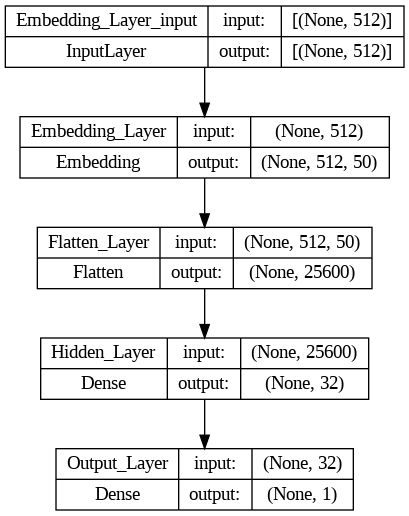

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten, LSTM, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model
from keras import backend as K
from IPython.display import Image, display, clear_output
import ipywidgets as widgets
import keras_tuner as kt

# Clear any previous session
K.clear_session()

# Avoid randomization to get consistent results on fine-tuning hyperparameters.
np.random.seed(42)
tf.random.set_seed(42)

# Hyperparameters
EMBEDDING_DIM = 50
HIDDEN_UNITS = 32
HIDDEN_ACTIVATION = 'tanh'
OUTPUT_UNITS = 1
OUTPUT_ACTIVATION = 'sigmoid'
LEARNING_RATE = 0.001
TEST_SIZE = 0.2
EPOCHS = 5
BATCH_SIZE = 128


# BACKUP
#EMBEDDING_DIM = 50
#HIDDEN_UNITS = 50
#HIDDEN_ACTIVATION = 'relu'
#OUTPUT_UNITS = 1
#OUTPUT_ACTIVATION = 'sigmoid'
#LEARNING_RATE = 0.0005

# Hyperparameters for data splitting and training
#TEST_SIZE = 0.2
#EPOCHS = 6
#BATCH_SIZE = 128

def build_flatten_model(hp=None):
    model = Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=maxlen, name='Embedding_Layer'))
    model.add(Flatten(name='Flatten_Layer'))

    # Use hp for hidden units or default to HIDDEN_UNITS
    hp_units = HIDDEN_UNITS if not hp else hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(hp_units, activation=HIDDEN_ACTIVATION, name='Hidden_Layer'))

    model.add(Dense(OUTPUT_UNITS, activation=OUTPUT_ACTIVATION, name='Output_Layer'))

    # Use hp for learning rate or default to LEARNING_RATE
    hp_learning_rate = LEARNING_RATE if not hp else hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    optimizer = RMSprop(learning_rate=hp_learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


def build_lstm_model(hp=None):
    model = Sequential()
    model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=maxlen, name='Embedding_Layer'))

    # Use hp for LSTM hidden units for the first layer
    hp_units_1 = 64 if not hp else hp.Int('lstm_units_1', min_value=32, max_value=512, step=32)
    model.add(LSTM(hp_units_1, return_sequences=True, kernel_initializer='he_uniform', name='LSTM_Layer_1'))

    # Use hp to select dropout rate after the first LSTM layer
    hp_dropout_1 = 0.2 if not hp else hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout_1))

    # Use hp for LSTM hidden units for the second layer
    hp_units_2 = 64 if not hp else hp.Int('lstm_units_2', min_value=32, max_value=512, step=32)
    model.add(LSTM(hp_units_2, kernel_initializer='he_uniform', name='LSTM_Layer_2'))

    # Use hp to select dropout rate after the second LSTM layer
    hp_dropout_2 = 0.2 if not hp else hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout_2))

    model.add(Dense(OUTPUT_UNITS, activation=OUTPUT_ACTIVATION, name='Output_Layer'))

    # Use hp for learning rate
    hp_learning_rate = LEARNING_RATE if not hp else hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    optimizer = RMSprop(learning_rate=hp_learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Callback for reducing learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Hyperparameter tuning setup
def run_hyperparameter_tuning():
    tuner = kt.Hyperband(build_lstm_model,
                         objective='val_accuracy',
                         max_epochs=10,
                         factor=3,
                         directory='ktuner_dir',
                         project_name='ktuner_proj')

    tuner.search(X_train, y_train, epochs=3, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # You need to provide validation data during the search
    # Assuming X_train, y_train, X_val, y_val are defined
    tuner.search(X_train, y_train, epochs=3, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Get the optimal hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Print the hyperparameters
    print(f"Best LSTM units for the first layer: {best_hps.get('lstm_units_1')}")
    print(f"Best dropout after the first LSTM layer: {best_hps.get('dropout_1')}")
    print(f"Best LSTM units for the second layer: {best_hps.get('lstm_units_2')}")
    print(f"Best dropout after the second LSTM layer: {best_hps.get('dropout_2')}")
    print(f"Best learning rate: {best_hps.get('learning_rate')}")

model_choice_dropdown = widgets.Dropdown(options=['flatten', 'lstm'], description='Model Choice:', value='flatten')

# Callback function to set selected_model based on dropdown choice
def set_model_choice(button):
    global selected_model
    selected_model = model_choice_dropdown.value
    print(f"Model set to: {selected_model}")
    if selected_model == "flatten":
        model = build_flatten_model()
    else:
        model = build_lstm_model()

    # Enhanced Keras plot_model
    plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')
    display(Image(filename='model.png'))

# Button to confirm model choice
confirm_button = widgets.Button(description="Confirm Model Choice")
confirm_button.on_click(set_model_choice)

# Display dropdown and button
display(model_choice_dropdown, confirm_button)


##2.3.Training the model.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import json
import os
import shutil

# Function to clear previous tuning data
def clear_tuning_data(button):
    tuning_directory = 'my_dir'
    project_name = 'hyper_tuning'
    path = os.path.join(tuning_directory, project_name)

    if os.path.exists(path):
        shutil.rmtree(path)
        print("Cleared previous tuning data.")
    else:
        print("No previous tuning data found.")

# Create and display a button to clear tuning data
clear_data_button = widgets.Button(description="Clear Previous Tuning Data")
clear_data_button.on_click(clear_tuning_data)
display(clear_data_button)

# Directory to save models and histories
SAVE_DIR = '/content/drive/MyDrive/Assessment3'

# Widget for setting the model name
model_name_text = widgets.Text(value='', placeholder='Enter model name', description='Model Name:', disabled=False)
print(f"Model Chosen: {selected_model}")
print(f"Total vocabulary size (unique tokens): {vocab_size}.")
print(f"Maximum review length (in terms of tokens): {maxlen}.")
print(f"Total tokens in negative reviews: {total_tokens_negative}.")
print(f"Total tokens in positive reviews: {total_tokens_positive}.")
print(f"Average length of negative reviews: {avg_length_negative:.2f} tokens.")
print(f"Average length of positive reviews: {avg_length_positive:.2f} tokens.")
print(f"Most frequent token: '{sorted_tokens[0][0]}' with {sorted_tokens[0][1]} occurrences.")
print(f"Least frequent token: '{sorted_tokens[-1][0]}' with {sorted_tokens[-1][1]} occurrences.")

# Train button widget
train_button = widgets.Button(description="Start Training")

# Display widgets
display(model_name_text, train_button)

def train_and_save(button):
    # Start hyperparameter tuning using kt.Hyperband (You can replace this with kt.RandomSearch if desired)
    tuner = kt.Hyperband(build_hypermodel,
                         objective='val_accuracy',
                         max_epochs=7,
                         factor=2,
                         directory='my_dir',
                         project_name='hyper_tuning')

    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    tuner.search(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[stop_early, reduce_lr])

    # Get best hyperparameters and build the model
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    model = tuner.hypermodel.build(best_hps)
    history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), batch_size=BATCH_SIZE, callbacks=[early_stopping, reduce_lr])

  # Convert history.history values to native Python types
    history_dict = {k: [float(val) for val in v] for k, v in history.history.items()}

    # Save the model using the provided name
    model_name = model_name_text.value
    if model_name:
        model_path = os.path.join(SAVE_DIR, f"{model_name}.h5")
        model.save(model_path)

        # Save training history
        history_path = os.path.join(SAVE_DIR, f"{model_name}.history")
        with open(history_path, "w") as file:
            json.dump(history_dict, file)

        print(f"Model saved to: {model_path}")
        print(f"Training history saved to: {history_path}")
    else:
        print("Please specify a model name in the text field before training.")

# Attach the train_and_save function to the button's on_click event
train_button.on_click(train_and_save)


# Define and compile the hypermodel
def build_hypermodel(hp):
    if selected_model == 'flatten':
        return build_flatten_model(hp)
    elif selected_model == 'lstm':
        # Modify this accordingly
        return build_lstm_model(hp)
    else:
        print("Unknown model choice. Defaulting to Flatten-based model.")
        return build_flatten_model(hp)

def build_model():
    if selected_model == 'flatten':
        return build_flatten_model()
    elif selected_model == 'lstm':
        return build_lstm_model()
    else:
        print("Unknown model choice. Defaulting to Flatten-based model.")
        return build_flatten_model()


## Evaluate Training Performance

Dropdown(description='Select Model:', options=('013.h5', '014.h5'), value='013.h5')

Text(value='', description='Word:', placeholder='Type a word')

Button(description='Plot Model Performance', style=ButtonStyle())

Button(description='Find Similar Words', style=ButtonStyle())

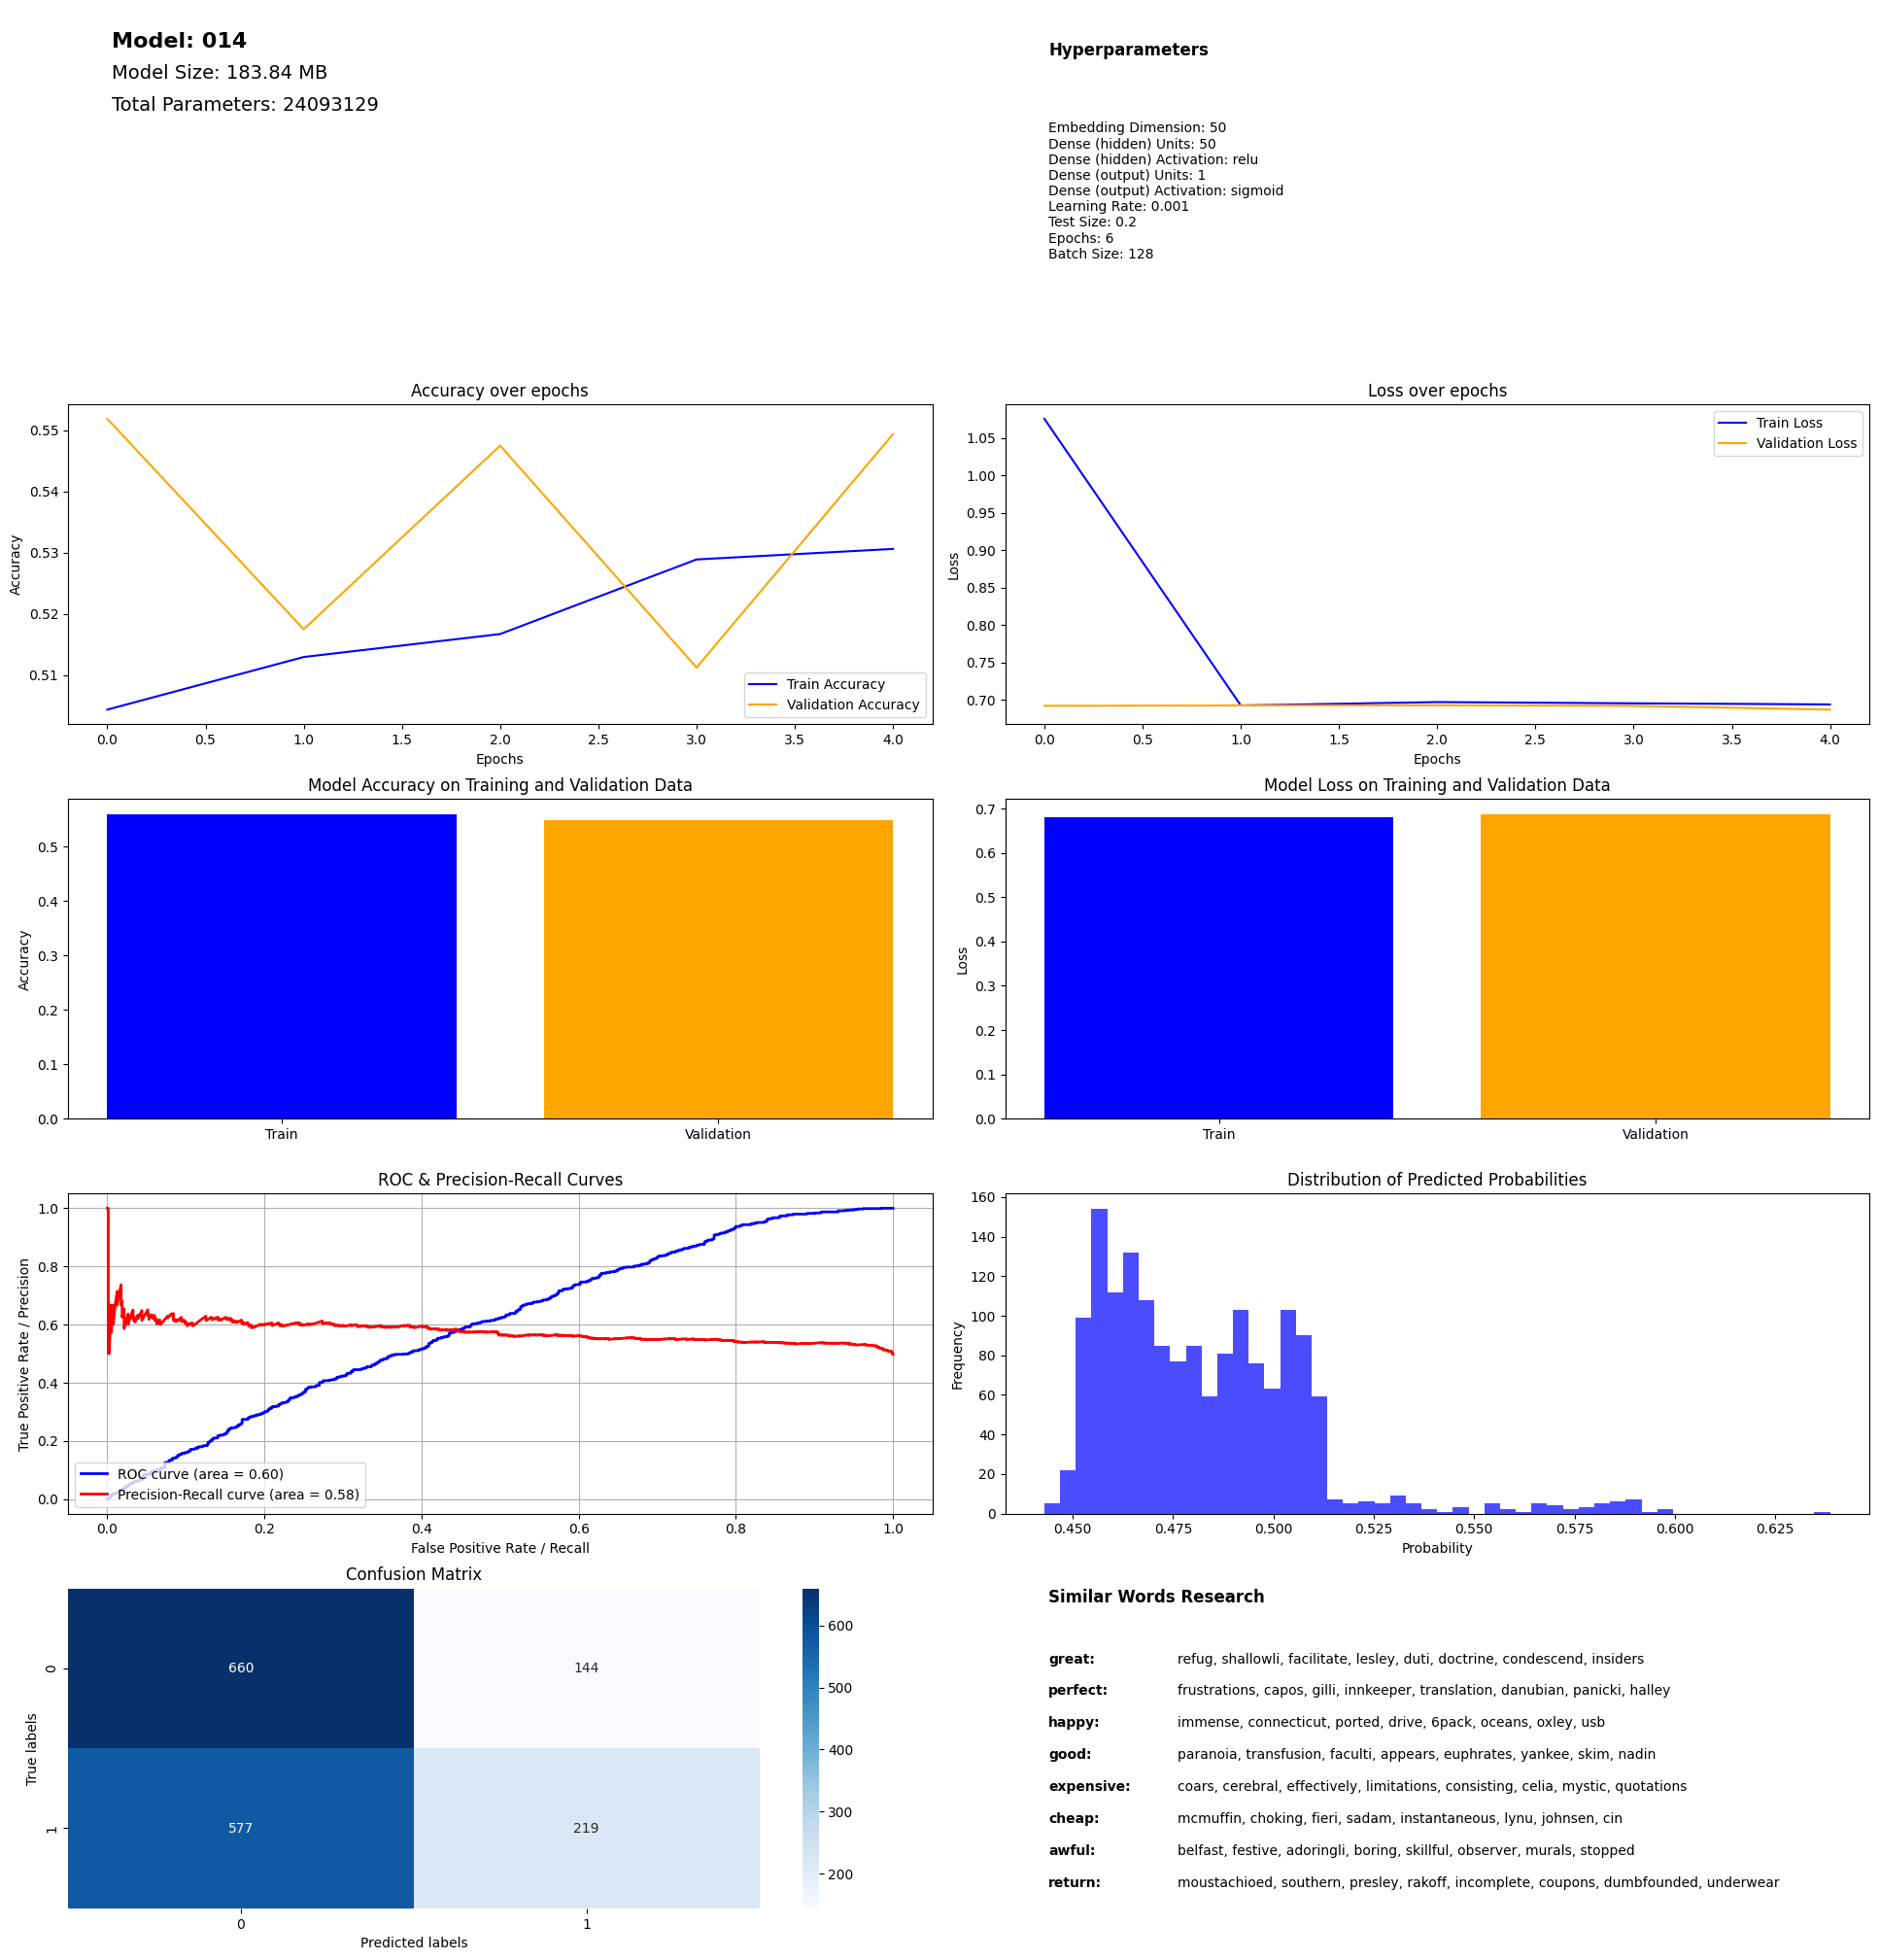

In [ ]:
import os
from keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import json
import numpy as np

import matplotlib.pyplot as plt

# Define hyperparameters
hyperparameters = {
    'Embedding Dimension': '50',
    'Dense (hidden) Units': '50',
    'Dense (hidden) Activation': 'relu',
    'Dense (output) Units': '1',
    'Dense (output) Activation': 'sigmoid',
    'Learning Rate': '0.001',
    'Test Size': '0.2',
    'Epochs': '6',
    'Batch Size': '128'
}



# Directory where models are saved
MODEL_DIR = '/content/drive/MyDrive/Assessment3'

# Load Model Function
def load_trained_model(model_path):
    # print(f"Loading model from: {model_path}")
    return load_model(model_path)

def get_model_size(model_path):
    """Return the model size in MB."""
    size_in_bytes = os.path.getsize(model_path)
    size_in_megabytes = size_in_bytes / (1024 * 1024)  # Convert bytes to MB
    return round(size_in_megabytes, 2)


def find_similar_words(word, model, tokenizer, top_n=8):
    word_index = tokenizer.word_index.get(word, None)
    if word_index is None:
        print(f"Word '{word}' not found in tokenizer's vocabulary.")
        return []

    # Assuming the embedding layer is the first layer of the model
    embeddings = model.layers[0].get_weights()[0]
    word_embedding = embeddings[word_index]

    # Compute cosine similarities between the word's embedding and all other word embeddings
    dot_product = np.dot(embeddings, word_embedding)
    norms = np.linalg.norm(embeddings, axis=1) * np.linalg.norm(word_embedding)
    cosine_similarities = dot_product / norms

    # Get the top_n word indices sorted by cosine similarity
    sorted_indices = np.argsort(cosine_similarities)[::-1][:top_n + 1]  # +1 to exclude the word itself

    # Convert indices back to words and return (excluding the word itself)
    index_to_word = {idx: word for word, idx in tokenizer.word_index.items()}
    similar_words = [index_to_word[idx] for idx in sorted_indices if idx != word_index]

    return similar_words[:top_n]

# Dropdown for Model Selection
model_files = [f for f in os.listdir(MODEL_DIR) if f.endswith('.h5')]
model_dropdown = widgets.Dropdown(
    options=model_files,
    description='Select Model:',
    disabled=False,
)

def plot_model_performance(button):
    # Extracting the model name
    model_name = model_dropdown.value.split('.')[0]  # assuming model name is before the .h5 extension

    # Create a single main figure with multiple subplots
    fig = plt.figure(figsize=(20, 25))

    # Load the selected model
    model_path = os.path.join(MODEL_DIR, model_dropdown.value)
    selected_model = load_trained_model(model_path)

    # Title
    ax1 = fig.add_subplot(6, 2, 1)
    ax1.axis('off')
    ax1.text(0.05, 0.9, f"Model: {model_name}", ha='left', va='center', fontsize=16, fontweight='bold', transform=ax1.transAxes)
    model_size = get_model_size(model_path)
    ax1.text(0.05, 0.8, f"Model Size: {model_size} MB", ha='left', va='center', fontsize=14, transform=ax1.transAxes)
    total_params = selected_model.count_params()
    ax1.text(0.05, 0.7, f"Total Parameters: {total_params}", ha='left', va='center', fontsize=14, transform=ax1.transAxes)

    # Hyperparameters with Title
    ax2 = fig.add_subplot(6, 2, 2)
    ax2.axis('off')
    ax2.text(0.05, 0.9, "Hyperparameters", ha='left', va='top', fontsize=12, fontweight='bold', transform=ax2.transAxes)
    ax2.text(0.05, 0.65, "\n".join([f"{key}: {value}" for key, value in hyperparameters.items()]), ha='left', va='top', fontsize=10, transform=ax2.transAxes)

    # Evaluate the model on training and validation data
    train_loss, train_acc = selected_model.evaluate(X_train, y_train, verbose=0)
    val_loss, val_acc = selected_model.evaluate(X_test, y_test, verbose=0)

    # Load training history from JSON file
    history_filename = model_dropdown.value.replace('.h5', '.history')
    history_path = os.path.join(MODEL_DIR, history_filename)
    with open(history_path, "r") as file:
        loaded_history = json.load(file)

    # Accuracy and Loss Over Epochs
    ax2 = fig.add_subplot(6, 2, 3)
    ax2.plot(loaded_history['accuracy'], label='Train Accuracy', color='blue')
    ax2.plot(loaded_history['val_accuracy'], label='Validation Accuracy', color='orange')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.set_title('Accuracy over epochs')

    ax3 = fig.add_subplot(6, 2, 4)
    ax3.plot(loaded_history['loss'], label='Train Loss', color='blue')
    ax3.plot(loaded_history['val_loss'], label='Validation Loss', color='orange')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Loss')
    ax3.legend()
    ax3.set_title('Loss over epochs')

    # Model Accuracy & Model Loss on Training and Validation Data
    ax4 = fig.add_subplot(6, 2, 5)
    ax4.bar(['Train', 'Validation'], [train_acc, val_acc], color=['blue', 'orange'])
    ax4.set_ylabel('Accuracy')
    ax4.set_title('Model Accuracy on Training and Validation Data')

    ax5 = fig.add_subplot(6, 2, 6)
    ax5.bar(['Train', 'Validation'], [train_loss, val_loss], color=['blue', 'orange'])
    ax5.set_ylabel('Loss')
    ax5.set_title('Model Loss on Training and Validation Data')

    # ROC & Precision-Recall Curves and Distribution of Predicted Probabilities
    y_pred_probs = selected_model.predict(X_test, verbose=0)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
    avg_precision = average_precision_score(y_test, y_pred_probs)

    ax6 = fig.add_subplot(6, 2, 7)
    ax6.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax6.plot(recall, precision, color='red', lw=2, label=f'Precision-Recall curve (area = {avg_precision:.2f})')
    ax6.set_xlabel('False Positive Rate / Recall')
    ax6.set_ylabel('True Positive Rate / Precision')
    ax6.set_title('ROC & Precision-Recall Curves')
    ax6.legend(loc='lower left')
    ax6.grid(True)

    ax8 = fig.add_subplot(6, 2, 8)
    ax8.hist(y_pred_probs, bins=50, color='blue', alpha=0.7)
    ax8.set_title('Distribution of Predicted Probabilities')
    ax8.set_xlabel('Probability')
    ax8.set_ylabel('Frequency')

    # Confusion Matrix
    ax7 = fig.add_subplot(6, 2, 9)
    y_pred = (selected_model.predict(X_test, verbose=0) > 0.5).astype("int32")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax7)
    ax7.set_xlabel('Predicted labels')
    ax7.set_ylabel('True labels')
    ax7.set_title('Confusion Matrix')

    # Similar words with enhanced appearance
    words_to_search = ['great', 'perfect', 'happy', 'good', 'expensive', 'cheap', 'awful', 'return']
    ax10 = fig.add_subplot(6, 2, 10) # Move to slot next to Confusion Matrix
    ax10.axis('off')
    ax10.text(0.05, 1, "Similar Words Research", ha='left', va='top', fontsize=12, fontweight='bold', transform=ax10.transAxes)
    for i, word in enumerate(words_to_search):
        similar_words = find_similar_words(word, selected_model, tokenizer)
        ax10.text(0.05, 0.8 - i*0.1, f"{word}:", ha='left', va='top', fontsize=10, fontweight='bold', transform=ax10.transAxes)
        ax10.text(0.2, 0.8 - i*0.1, f"{', '.join(similar_words)}", ha='left', va='top', fontsize=10, transform=ax10.transAxes)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.savefig(f"{model_name}_all_plots.png")
    plt.show()

# Function to find and print similar words
def get_similar_words(button):
    word = text.value

    # Load the selected model
    model_path = os.path.join(MODEL_DIR, model_dropdown.value)
    selected_model = load_trained_model(model_path)

    similar_words = find_similar_words(word, selected_model, tokenizer)
    print(f"Similar words to '{word}': {', '.join(similar_words)}")

# Buttons
plot_button = widgets.Button(description="Plot Model Performance")
plot_button.on_click(plot_model_performance)

word_search_button = widgets.Button(description="Find Similar Words")
word_search_button.on_click(get_similar_words)

text = widgets.Text(value='', placeholder='Type a word', description='Word:', disabled=False)

# Display the widgets
display(model_dropdown)
display(text, plot_button, word_search_button)



Button(description='Display Additional Metrics', style=ButtonStyle())

Precision: 0.8238
Recall: 0.7575
F1-score: 0.7893


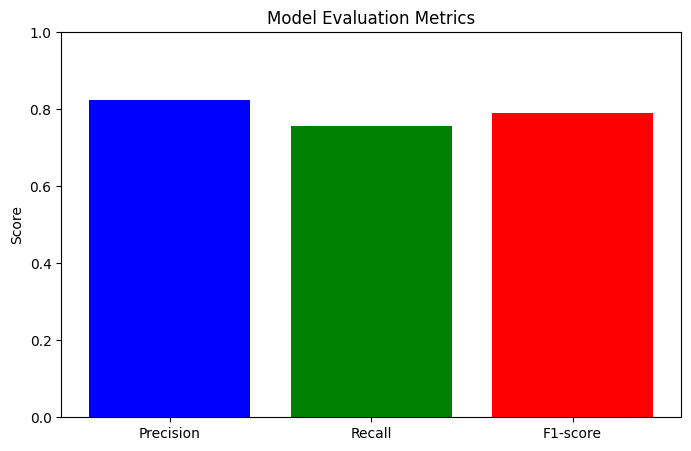

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to calculate, display, and visualize additional metrics
def display_additional_metrics(button):
    # Extracting the model name from the dropdown
    model_name = model_dropdown.value.split('.')[0]
    model_path = os.path.join(MODEL_DIR, model_dropdown.value)

    # Load the selected model
    loaded_model = load_trained_model(model_path)
    y_pred_probs = loaded_model.predict(X_test, verbose=0)
    y_pred = (y_pred_probs > 0.5).astype("int32")

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Display metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Visualize metrics
    metrics = ['Precision', 'Recall', 'F1-score']
    values = [precision, recall, f1]

    plt.figure(figsize=(8, 5))
    plt.bar(metrics, values, color=['blue', 'green', 'red'])
    plt.ylim([0, 1])  # setting y-axis limits to [0, 1] for better visualization
    plt.title('Model Evaluation Metrics')
    plt.ylabel('Score')
    plt.show()

# Create a button for additional metrics
metrics_button = widgets.Button(description="Display Additional Metrics")
metrics_button.on_click(display_additional_metrics)

# Display the button
display(metrics_button)



In [ ]:
# Import Statements
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.display import display, HTML
import ipywidgets as widgets
import os
import contextlib

# Constants and Global Variables
MODEL_DIR = '/content/drive/MyDrive/Assessment3'
current_model_name = None
loaded_model = None

# Function Definitions
def load_trained_model(model_path):
    return load_model(model_path)

def map_sentiment_to_color(prediction_value):
    # Define the maximum and minimum scores that correspond to green and red colors
    green_max = 0.75
    red_min = 0.3

    # Scale the prediction_value to be between red_min and green_max
    scaled_prediction = max(red_min, min(green_max, prediction_value))

    # Calculate the proportion of red and green based on the scaled prediction
    red = min(1, 2 * (green_max - scaled_prediction) / (green_max - red_min))
    green = min(1, 2 * (scaled_prediction - red_min) / (green_max - red_min))

    return f"rgb({int(255*red)}, {int(255*green)}, 0)"

def preprocess_text(text, tokenizer):
    tokens = tokenizer.texts_to_sequences([text])
    recognized_words = [word for word in text.split() if word in tokenizer.word_index]
    padded_input = pad_sequences(tokens, maxlen=6760, padding='post', truncating='post')
    return padded_input, recognized_words

def get_model_filenames():
    return [filename for filename in os.listdir(MODEL_DIR) if filename.endswith(".h5")]

def get_or_load_model():
    global current_model_name, loaded_model
    selected_model_name = model_dropdown.value
    if current_model_name != selected_model_name:
        current_model_name = selected_model_name
        loaded_model = load_trained_model(os.path.join(MODEL_DIR, selected_model_name))
    return loaded_model

def predict_sentiment(button):
    # Ensure we have the right model loaded
    selected_model = get_or_load_model()

    # Preprocess the input text
    input_text = user_input.value
    processed_input, recognized_words = preprocess_text(input_text, tokenizer)

    # Predict the sentiment
    with open(os.devnull, 'w') as devnull:
        with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
            prediction = selected_model.predict(processed_input)[0][0]

    # Map prediction to color
    color = map_sentiment_to_color(prediction)

    # Display the result
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    output_label.value = f"Predicted Sentiment: {sentiment} (Confidence: {prediction:.4f})"
    recognized_label.value = f"Recognized Words: {' '.join(recognized_words)}"

    return prediction

# Widgets
user_input = widgets.Text(value='', placeholder='Enter your review here', description='Review:', disabled=False)
model_dropdown = widgets.Dropdown(
    options=get_model_filenames(),
    description='Select Model:',
    disabled=False,
)
predict_button = widgets.Button(description="Predict Sentiment")
evaluate_examples_button = widgets.Button(description="Evaluate Examples")
output_label = widgets.Label(value="Predicted Sentiment will appear here.")
recognized_label = widgets.Label(value="Recognized words will appear here.")

# Example positive and negative reviews for testing
positive_reviews = [
    "This is the best experience I've ever had! Absolutely amazing!",
    "Highly recommend, you won't be disappointed. Excellent choice!",
    "Absolutely outstanding in every way! Highly recommended!",
    "I'm totally blown away by the quality and excellent service.",
    "Exceptional product, worth every penny and then some!",
    "Very satisfied and absolutely thrilled with my purchase.",
    "The food was delicious and satisfying. A culinary delight!",
    "The product meets my expectations. It's perfect for me!",
    "Good value for the price. A bargain indeed!",
    "It was a pleasant experience. Really enjoyable!",
    "I'm more than just generally happy with it; it's truly delightful.",
    "It's not just okay; it does an excellent job and is very reliable."
]

negative_reviews = [
    "I received a broken product and it is faulty.",
    "Misleading advertising, nothing like the description",
    "This is really bad; I'm returning it.",
    "This product is a complete waste of money; not worth a single cent.",
    "useless, bad quality, not worth the money, seller does not respond.",
    "overpriced for such terrible quality.",
    "Terrible customer service experience. Absolutely unacceptable.",
    "I regret making this purchase. A total waste of money.",
    "Absolutely disappointing, a waste of money. Horrendous experience.",
    "This is a complete disaster. terrible customer support.",
    "Worst product I've ever bought. Regrettable decision.",
    "Absolutely bad quality, cheap material, avoid this. It's terrible.",
]



def evaluate_examples_button_click(button):
    display(HTML("<h3 style='font-size: larger; font-weight: bold;'>Positive Reviews:</h3>"))
    for i, review in enumerate(positive_reviews, start=1):
        user_input.value = review
        prediction = predict_sentiment(predict_button)
        color = map_sentiment_to_color(prediction)
        display(HTML(f"""
            <div style='background-color: {color}; padding: 5px;'>
                <span style='font-size: larger; font-weight: bold; color: black;'>Score: {prediction:.2f}</span>
                <span style='font-size: larger; font-weight: bold; color: black;'> - Example {i}: {review}</span>
            </div>
        """))

    display(HTML("<h3 style='font-size: larger; font-weight: bold;'>Negative Reviews:</h3>"))
    for i, review in enumerate(negative_reviews, start=1):
        user_input.value = review
        prediction = predict_sentiment(predict_button)
        color = map_sentiment_to_color(prediction)
        display(HTML(f"""
            <div style='background-color: {color}; padding: 5px;'>
                <span style='font-size: larger; font-weight: bold; color: black;'>Score: {prediction:.2f}</span>
                <span style='font-size: larger; font-weight: bold; color: black;'> - Example {i}: {review}</span>
            </div>
        """))

def predict_button_click(button):
    prediction = predict_sentiment(button)


predict_button.on_click(predict_button_click)
evaluate_examples_button.on_click(evaluate_examples_button_click)

# Display widgets
display(model_dropdown, user_input, predict_button, evaluate_examples_button, output_label, recognized_label)


Dropdown(description='Select Model:', options=('004.h5', '005.h5'), value='004.h5')

Text(value='', description='Review:', placeholder='Enter your review here')

Button(description='Predict Sentiment', style=ButtonStyle())

Button(description='Evaluate Examples', style=ButtonStyle())

Label(value='Predicted Sentiment will appear here.')

Label(value='Recognized words will appear here.')

In [ ]:
!pip install streamlit -1


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -1


In [ ]:
model.save('/content/drive/MyDrive/Assessment3/model_Chunk_Emb50_Acc80_Den20.h5') not this so far.
